##Tableau 每月复购率分析
在数据探索阶段，我们利用 Tableau 进行了初步的数据分析，以更直观地理解客户行为、复购模式以及用户价值分层。



*   目标：计算并可视化每月的复购率，以评估客户忠诚度。

*   方法：

1. 计算每月下单次数 ≥2 的复购用户数：
```
# IF { FIXED [Customer ID], DATE_TRUNC('month', [Invoice Date]): COUNTD([Invoice No]) } >= 2
THEN 1 ELSE 0 END
```
2. 计算该月的总用户数：
```
# { FIXED DATE_TRUNC('month', [Invoice Date]): COUNTD([Customer ID]) }
```
3. 计算最终的复购率：
```
# SUM([复购用户数]) / SUM([总用户数])
```


*   可视化：
*   在 Tableau 中绘制 时间序列折线图，纵轴为复购率，横轴为月份，观察复购率的变化趋势。




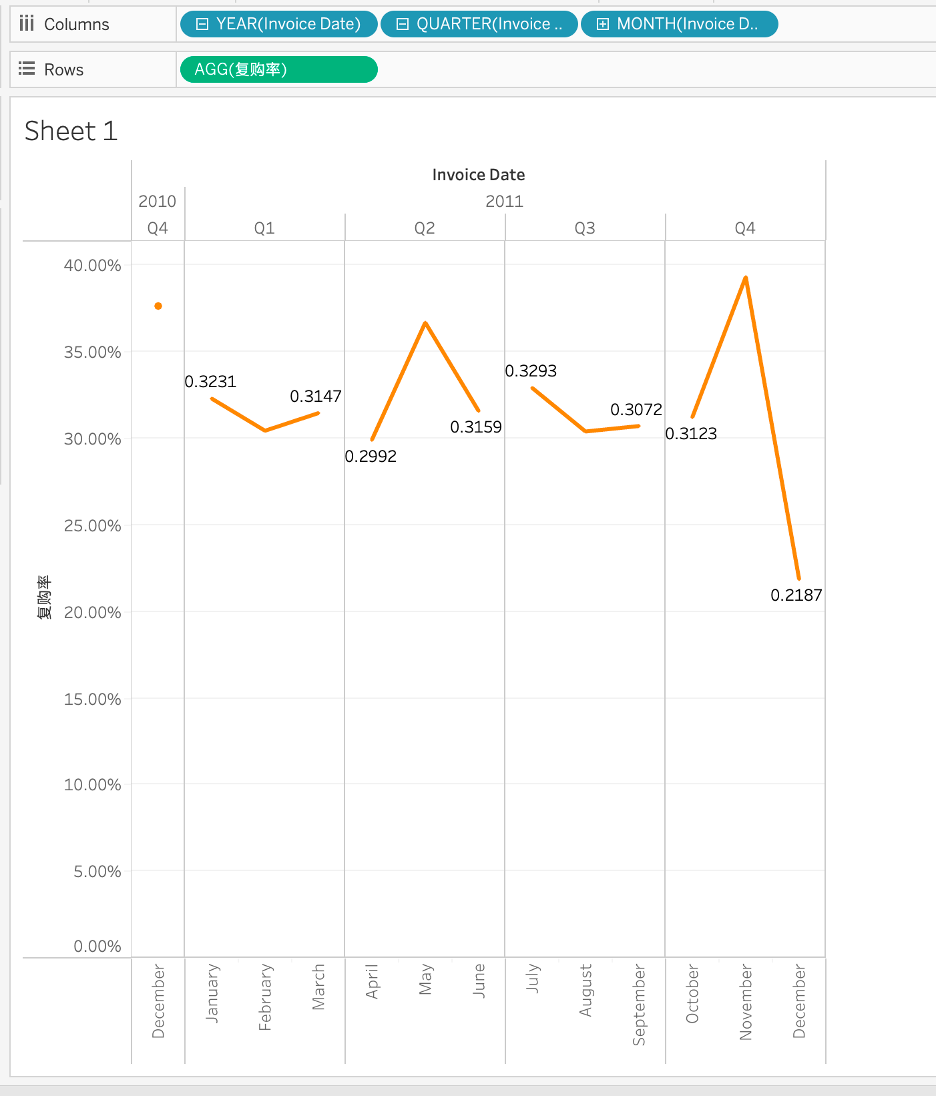

##Tableau RFM 分析(初步识别高价值客户)



*   目标：通过 RFM（Recency、Frequency、Monetary） 识别高价值客户，并进行客户分层。

*   R 指标（最近一次购买时间）：计算每个用户距当前时间的最后一次购买时间。数值越小，代表该用户近期仍活跃。

*   F 指标（购买频率）：计算每个用户的订单总数。数值越高，代表用户忠诚度较高。

*   M 指标（消费金额）：计算用户的总消费金额。数值越高，代表用户贡献较高的营收。
*   RFM 评分：将 R、F、M 指标按区间划分为 1-5 级，R 越低、F 和 M 越高，则用户评分越高。最终计算 RFM 总评分 = R + F + M。





计算 RFM 指标：
1. R（最近一次购买时间）：
```
# DATEDIFF('day', { FIXED [Customer ID]: MAX([Invoice Date]) }, #2011-12-31#)
```
2. F（购买频率）：
```
# { FIXED [Customer ID]: COUNTD([Invoice No]) }
```
3. M（消费金额）：
```
# { FIXED [Customer ID]: SUM([Total Amount]) }
```





计算 RFM 评分：
1. R 评分：
```
# IF [R_最近购买天数] <= 30 THEN 5
ELSEIF [R_最近购买天数] <= 90 THEN 4
ELSEIF [R_最近购买天数] <= 180 THEN 3
ELSEIF [R_最近购买天数] <= 365 THEN 2
ELSE 1 END
```
2. F 评分：
```
# IF [F_购买频率] >= 20 THEN 5
ELSEIF [F_购买频率] >= 10 THEN 4
ELSEIF [F_购买频率] >= 5 THEN 3
ELSEIF [F_购买频率] >= 2 THEN 2
ELSE 1 END
```
3. M 评分：
```
# IF [M_消费金额] >= 5000 THEN 5
ELSEIF [M_消费金额] >= 2000 THEN 4
ELSEIF [M_消费金额] >= 1000 THEN 3
ELSEIF [M_消费金额] >= 500 THEN 2
ELSE 1 END
```
4. 计算 RFM 总分：
```
# [R_评分] + [F_评分] + [M_评分]
```






*   客户价值分层：
```
# IF [RFM_总评分] >= 12 THEN "高价值客户"
ELSEIF [RFM_总评分] >= 8 THEN "中等价值客户"
ELSE "低价值客户" END
```
*   高价值客户（RFM ≥ 12）：近期购买、购买频繁、消费金额大，需重点维护。
*   中等价值客户（8 ≤ RFM < 12）：有一定忠诚度，适合促销策略。
*   低价值客户（RFM < 8）：长时间未购买，需挖掘潜在需求。



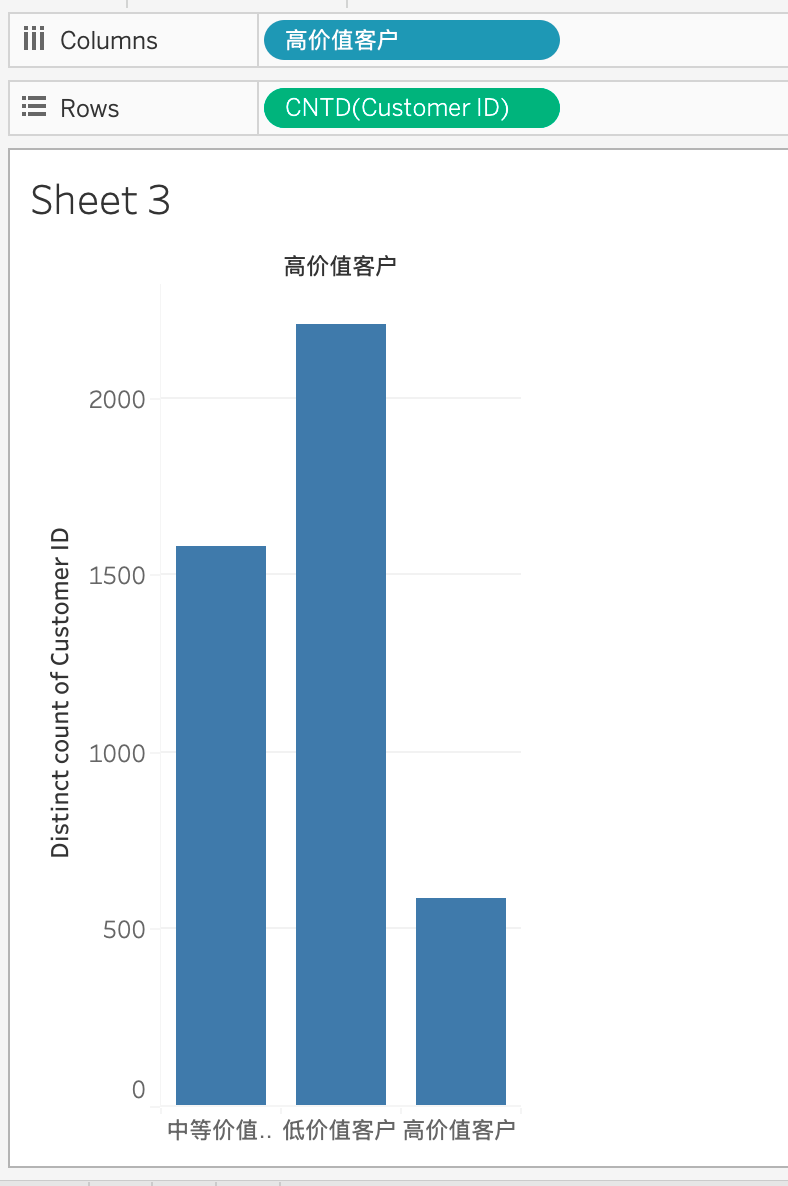

##Tableau 动态 RFM 用户分层


*   改进用户价值分层计算，使其动态调整

*   目标：让 RFM 评分的高低标准可以动态调整，而不是固定阈值。

*   方法：
1. 创建两个动态参数：
```
RFM_Threshold_High（默认值：12，范围 3-15）
RFM_Threshold_Low（默认值：8，范围 3-15）
```
2. 改进分层计算字段：
```
IF [RFM_总评分] >= [RFM_Threshold_High] THEN "高价值客户"
ELSEIF [RFM_总评分] >= [RFM_Threshold_Low] THEN "中等价值客户"
ELSE "低价值客户"
END
```
3. 可视化：
在 Tableau Show Parameter，可以动态调整 RFM_Threshold_High 和 RFM_Threshold_Low，实时查看用户分层变化。




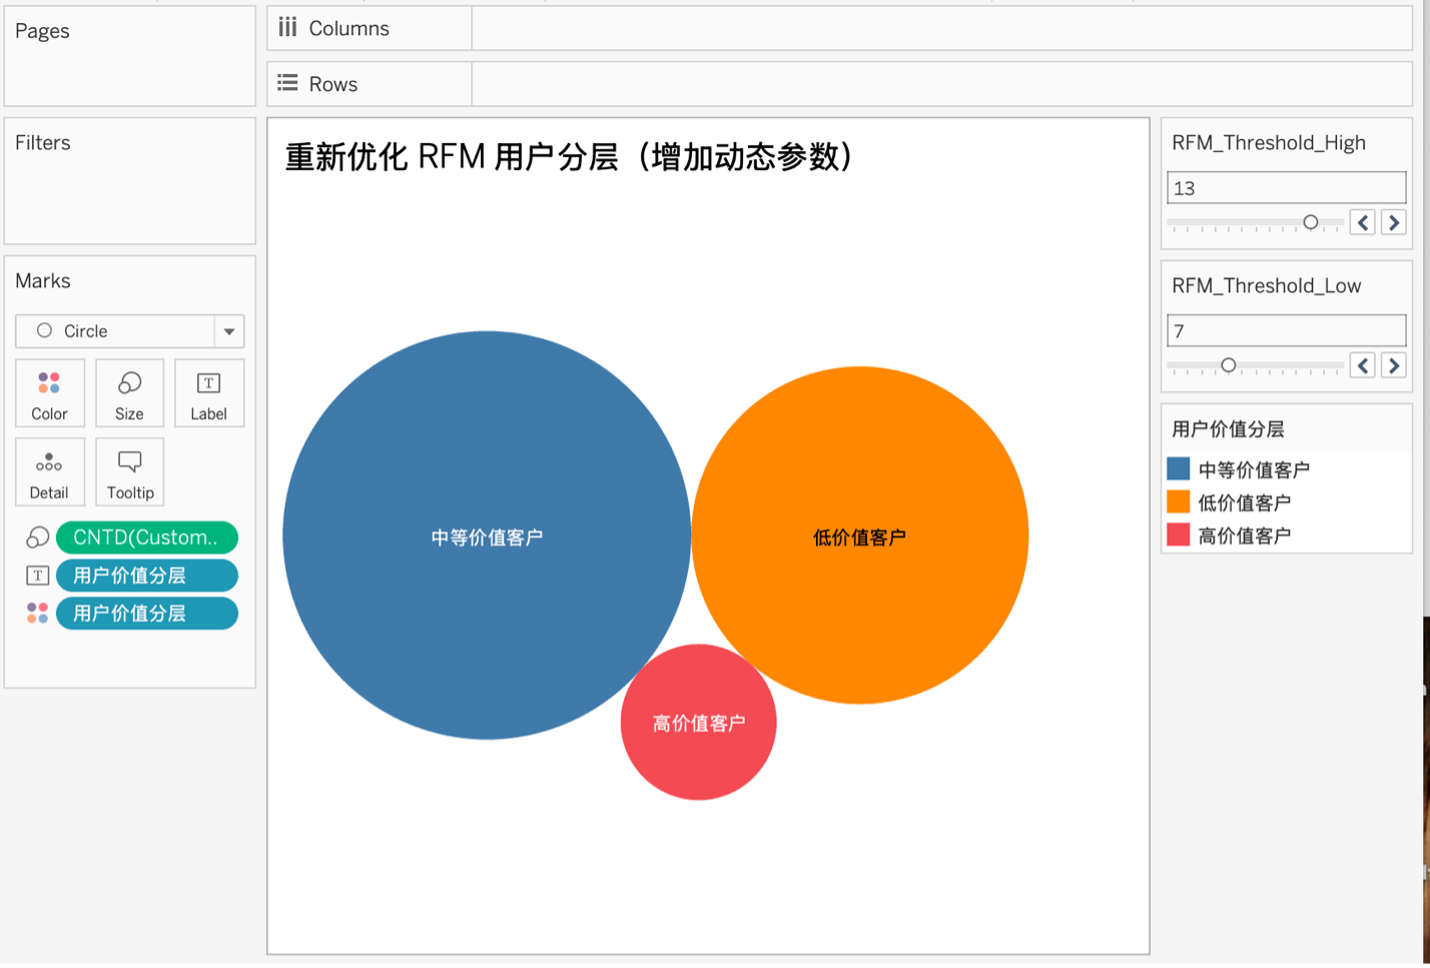

##Tableau 地理分布地图


*   目标：可视化不同国家/地区的客户分布，识别不同市场的客户行为。
*   方法：
1. 拖拽 Country 字段 到 Marks 里的 Detail。
2. 拖拽 COUNTD([Customer ID]) 到 Size，让气泡大小反映客户数量。
3. 拖拽高价值客户分层到 Color，区分高、中、低价值客户。
*   某些国家（如英国、德国）贡献较大营收，高价值客户较多。
*   低价值客户集中在某些特定市场，可能是受市场因素或物流影响。



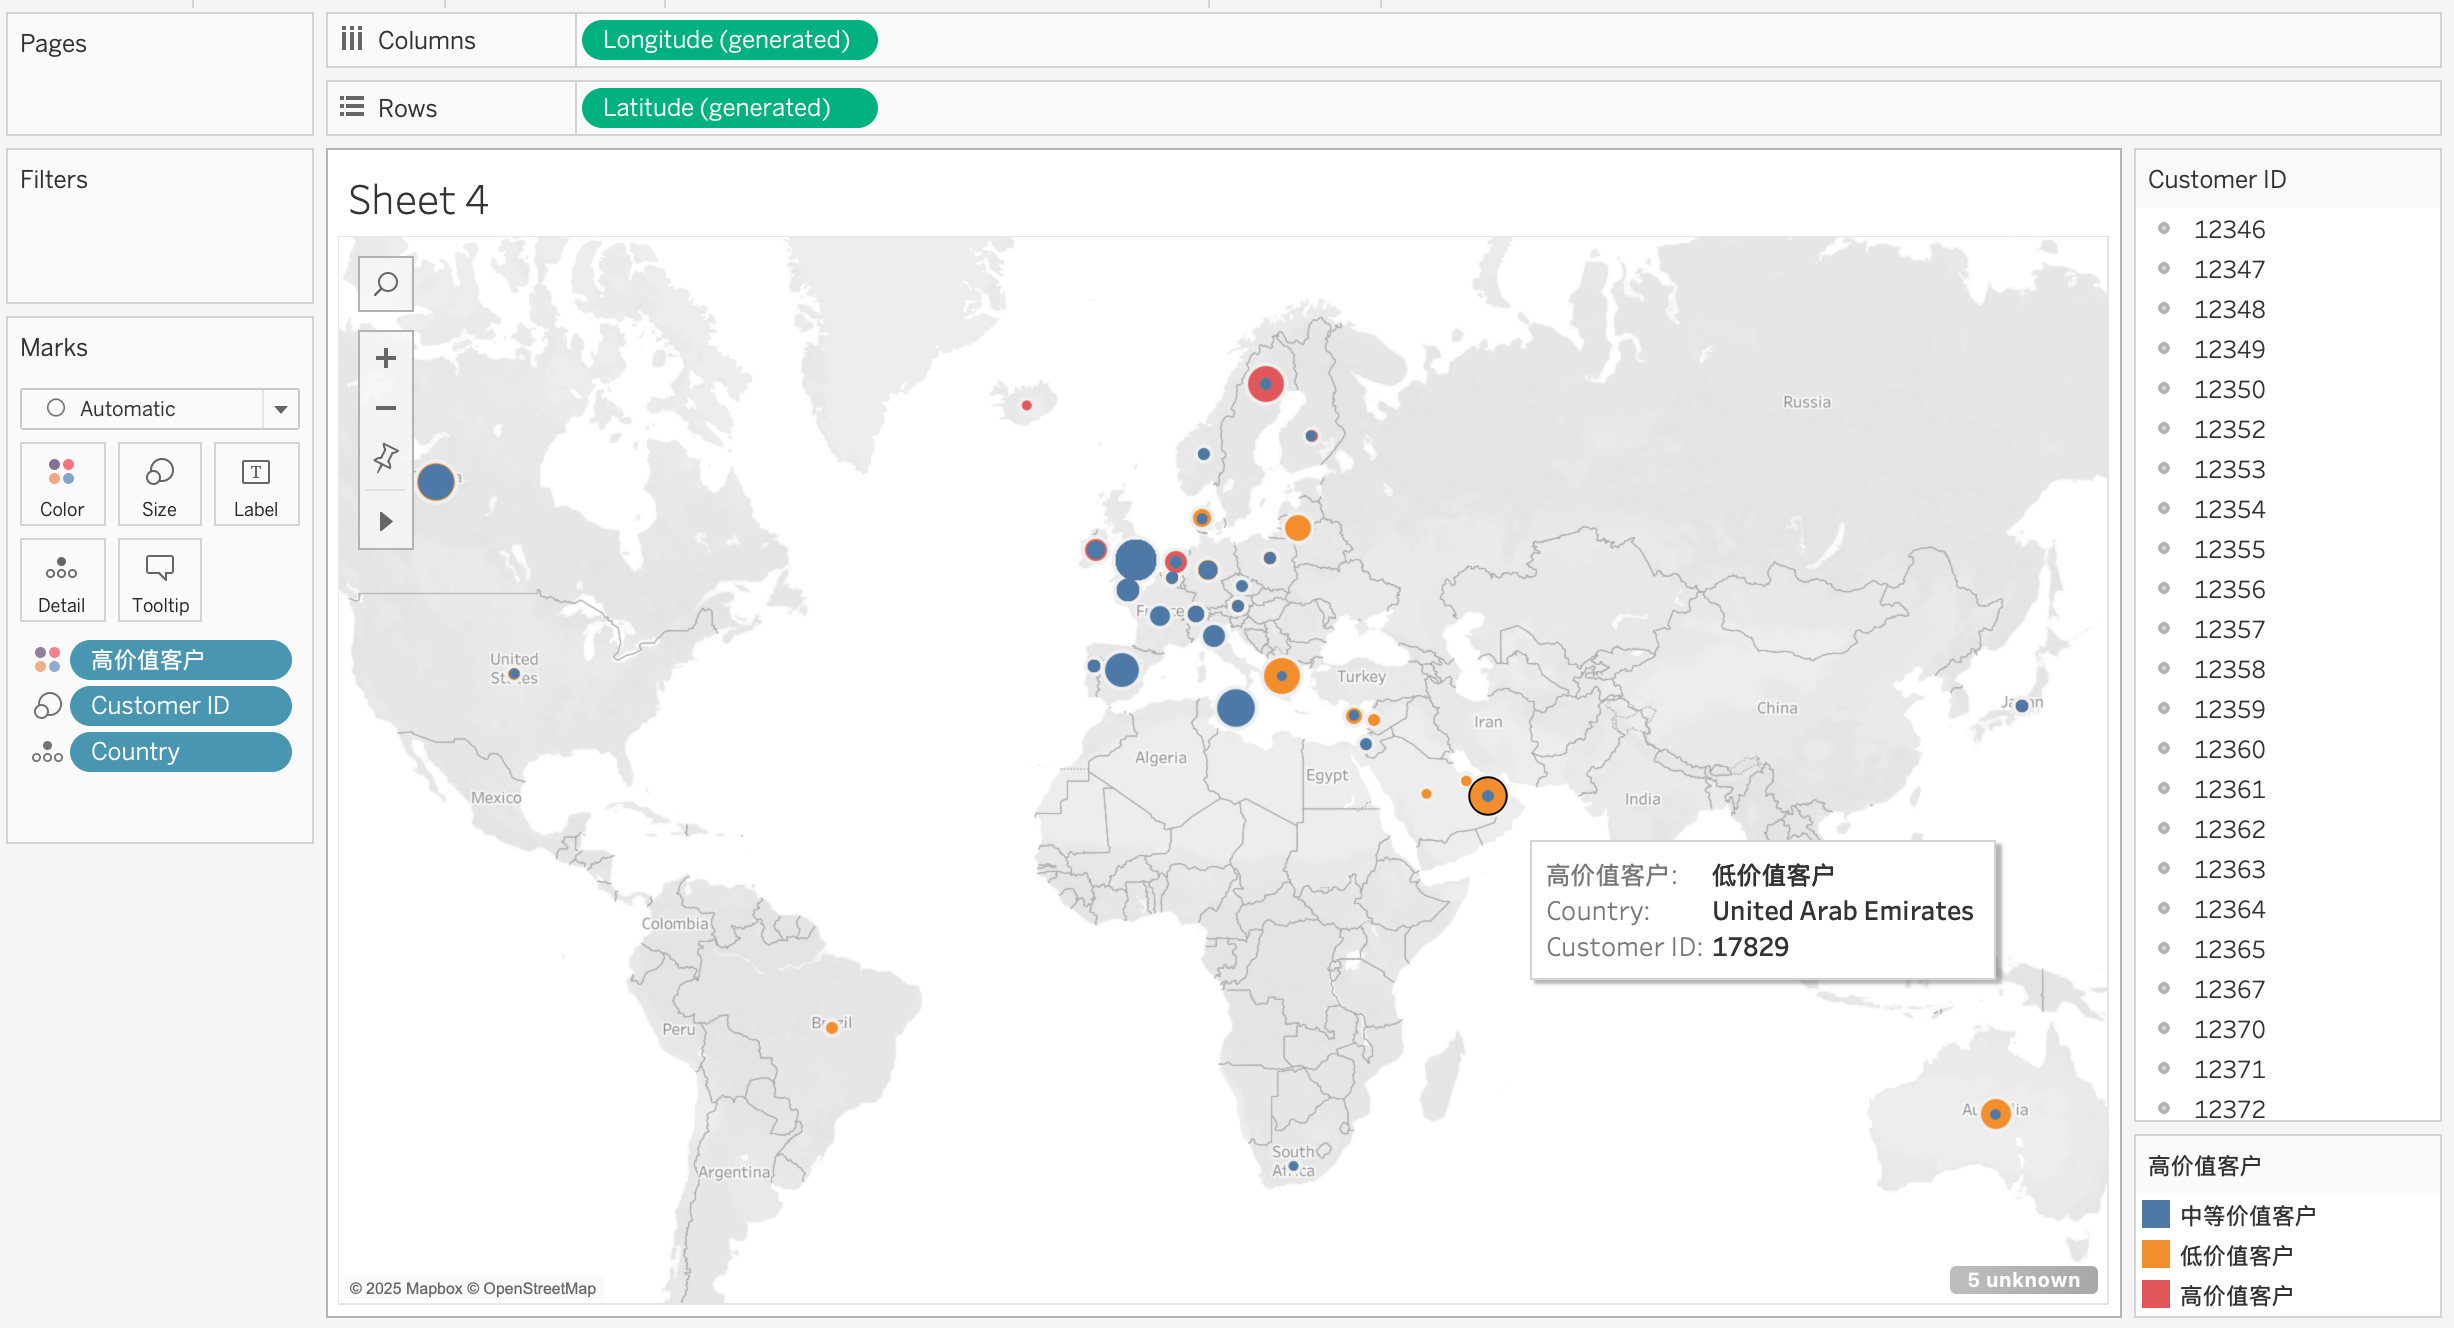